In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Loading and Transforming the Data

In [48]:
df=pd.read_csv("Index2018a.csv")
df.date=pd.to_datetime(df.date, dayfirst=True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [49]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Removing Surplus Data

In [50]:
df["Market_Value"]=df.spx

In [51]:
df.head()

,spx,dax,ftse,nikkei,Market_Value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [52]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

In [53]:
df.head()

,Market_Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [54]:
size=int(len(df)*0.8)
df, df_test=df.iloc[:size], df.iloc[size:]

In [55]:
df.tail()

,Market_Value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


## White Noise

In [56]:
wn=np.random.normal(loc=df.Market_Value.mean(), scale=df.Market_Value.std(), size=len(df))

In [57]:
df['wn']=wn

In [58]:
df.head(50)

,Market_Value,wn
date,,
1994-01-07,469.90,1035.165757
1994-01-10,475.27,1114.929669
1994-01-11,474.13,877.830499
1994-01-12,474.17,1428.068542
1994-01-13,472.47,960.215883
1994-01-14,474.91,1114.566544
1994-01-17,473.30,1541.454826
1994-01-18,474.25,1105.981268
1994-01-19,474.30,1218.460510


In [59]:
df.describe()

,Market_Value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.967142
std,292.559287,292.639321
min,438.920000,-71.194545
25%,914.620000,889.933685
50%,1144.650000,1092.958010
75%,1316.280729,1292.950197
max,1570.252238,2135.352172


In [60]:
## The generated wn values have mean almost equal to the Market values, because they are normanly distributed around the mean

## Graphing the white noise 

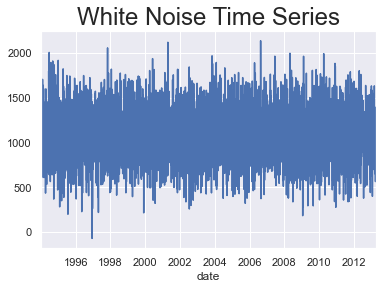

In [61]:
df.wn.plot()
plt.title('White Noise Time Series', size =24)
plt.show()

## Comparing the WN graph and the Market Value graph

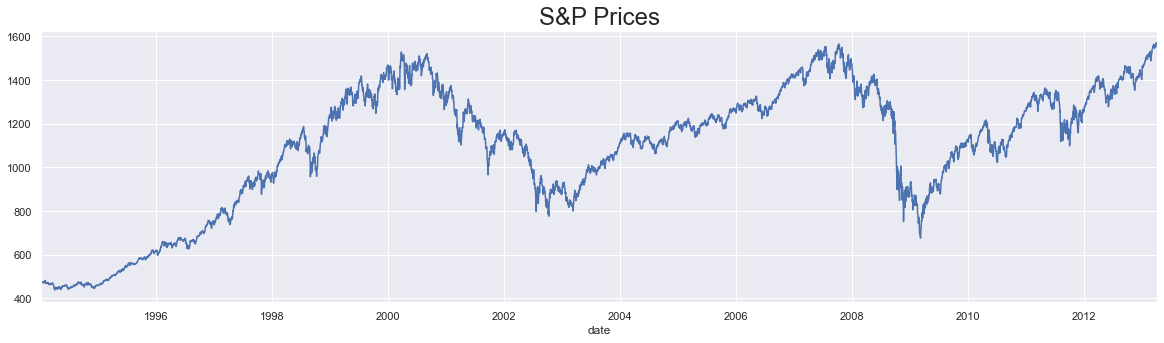

In [62]:
df.Market_Value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.show()

## for a better comparison, the Y axis of both graphs should be the same...## so we can set the Y axis of the prices

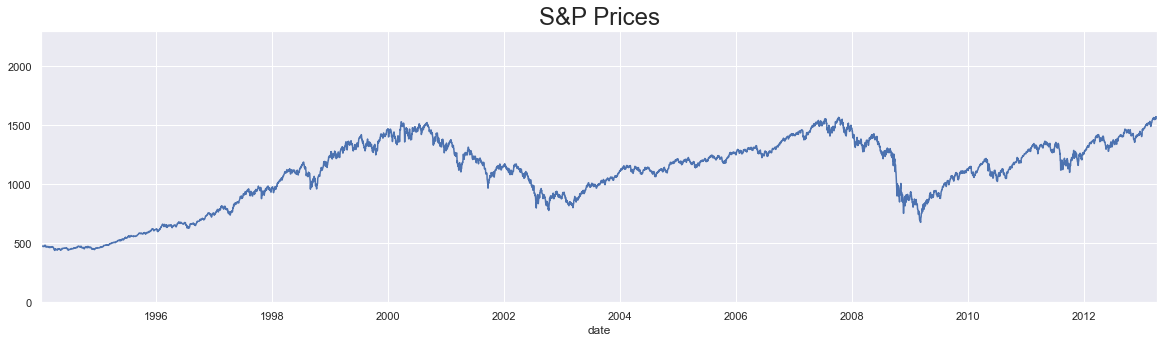

In [63]:
df.Market_Value.plot(figsize=(20,5))
plt.title("S&P Prices", size=24)
plt.ylim((0,2300))
plt.show()

## Random Walk

In [64]:
rw=pd.read_csv("RandWalk.csv")
rw.date=pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw=rw.asfreq('b')


In [65]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [66]:
df['rw']=rw.price

In [67]:
df.head()

,Market_Value,wn,rw
date,,,
1994-01-07,469.90,1035.165757,1122.139662
1994-01-10,475.27,1114.929669,1080.347860
1994-01-11,474.13,877.830499,1082.095245
1994-01-12,474.17,1428.068542,1083.639265
1994-01-13,472.47,960.215883,1067.146255


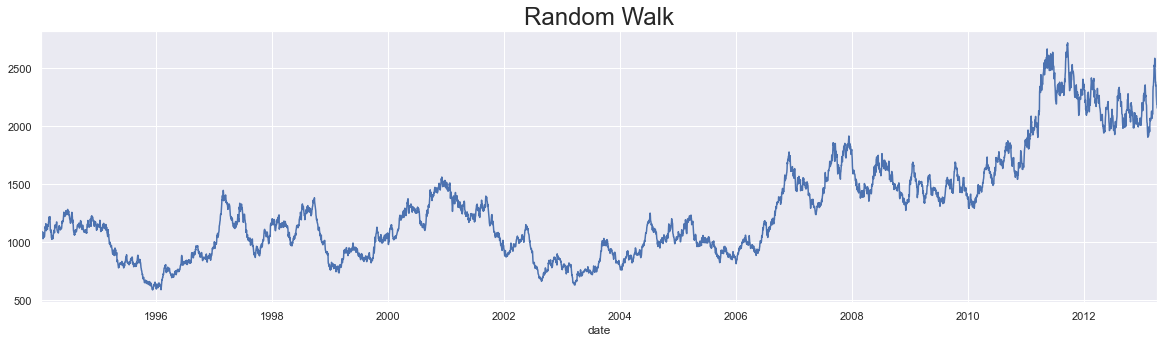

In [68]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk", size = 24)
plt.show()

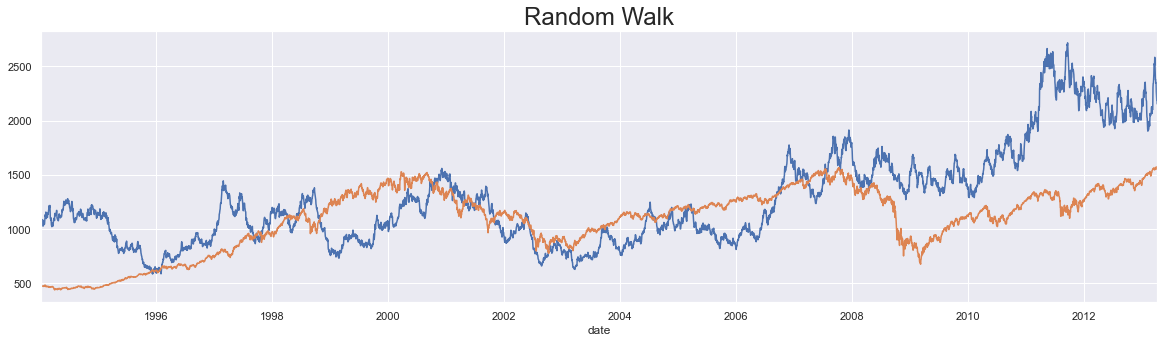

In [69]:
df.rw.plot(figsize=(20,5))
df.Market_Value.plot()
plt.title("Random Walk", size = 24)
plt.show()

### Stationarity

In [70]:
sts.adfuller(df.Market_Value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [71]:
##(-1.736984745235244,...test statistic...sho.uld be more negative, compared to the sig. levels for stationarity...
# 0.41216456967706194, p-value...must be significant, for stationarity...so non-stationary
# 18,.......lag length
# 5002,....no of observation

 #{'1%': -3.431658008603046,
 # '5%': -2.862117998412982,
 # '10%': -2.567077669247375},
# 39904.880607487445)....information criteria...expected to be lower

 ## testing stationarity of the white noise

In [72]:
sts.adfuller(df.wn)

(-71.20285559649264,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70802.09380162576)

In [73]:
## highly stationary...test statistic is more negative...p-value is significant...no lags in the regression

## Stationarity test for the Random Walk data

In [74]:
sts.adfuller(df.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

#### the statsmodel package has seasonal_decompose, that splits the time series into three parts. 

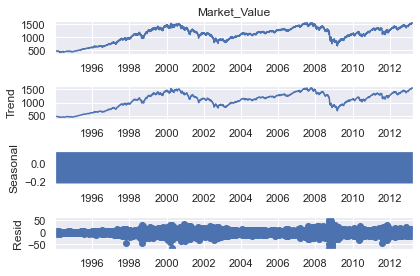

In [75]:
s_dec_additive = seasonal_decompose(df.Market_Value, model = "additive")
s_dec_additive.plot()
plt.show()


#Result of additive decomposition suggests no seasonality in the data.

In [76]:
### Using Multiplicate Decomposition to cross check 

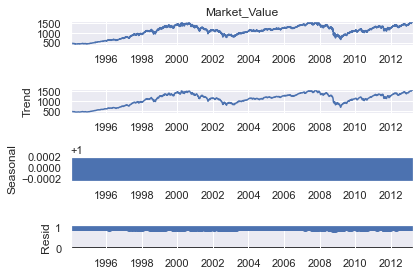

In [77]:
s_dec_multiplicative = seasonal_decompose(df.Market_Value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [78]:
##Trend is almost the same as Observed, and the seasonal is rectangular, NO SESONALITY

## Autocorrelation Function

Text(0.5, 1.0, 'ACF S&P')

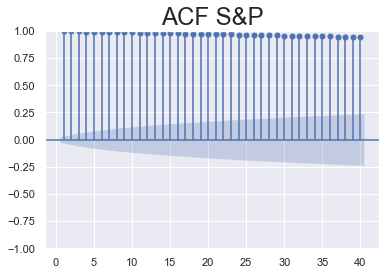

In [79]:
sgt.plot_acf(df.Market_Value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)

In [80]:
## Checking the ACF of a non-autocorrelation series, eg. the White Noise

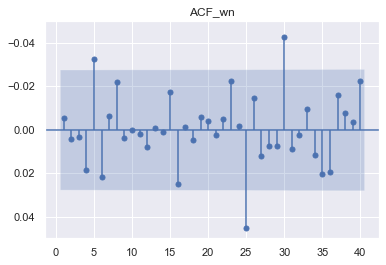

In [81]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF_wn")
plt.ylim(0.05,-0.05)
plt.show()

Text(0.5, 1.0, 'ACF RW')

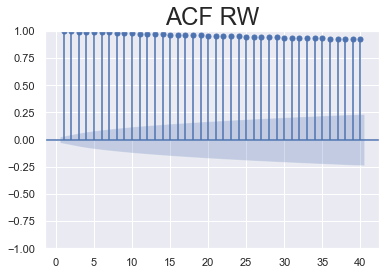

In [82]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)

## PACF

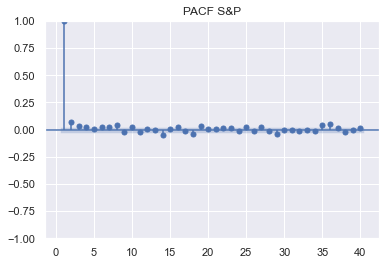

In [83]:
sgt.plot_pacf(df.Market_Value, lags = 40, zero=False, method="ols")
plt.title("PACF S&P")
plt.show()

In [84]:
## PACF of white noise

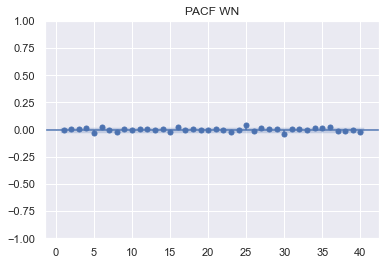

In [85]:
sgt.plot_pacf(df.wn, lags = 40, zero=False, method="ols")
plt.title("PACF WN")
plt.show()

In [ ]:
## PACF of random walk

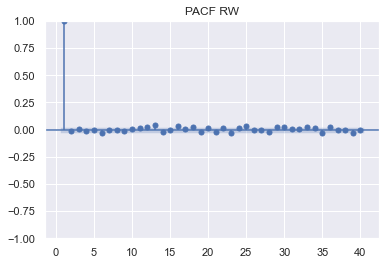

In [86]:
sgt.plot_pacf(df.rw, lags = 40, zero=False, method="ols")
plt.title("PACF RW")
plt.show()